In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

/home/denadai/.local/share/virtualenvs/crime-environment-u9RldRjF/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sns.set(style="white")
sns.set_context("paper")

def figsize(scale,ratio):
    fig_width_pt = 505.69                         # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    if(ratio == "golden"):                          # Golden ratio ...
        fig_height = fig_width*golden_mean          # height in inches
    else:                                           # ... or other ratio
        fig_height = fig_width*ratio
        
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {'backend': 'pdf',
                                            'axes.labelsize': 8,
                                            'xtick.labelsize': 8,
                                            'ytick.labelsize': 8,
                                            'legend.fontsize': 8,
                                            'lines.markersize': 3,
                                            'font.size': 8,
                                            'font.family': u'sans-serif',
                                            'font.sans-serif': ['Arial'],
                                            'text.usetex': False}
matplotlib.rcParams.update(pgf_with_latex)

In [28]:
def walkscore(meters):
	max_walk = 1500
	score = np.exp(-5 * (meters/max_walk) ** 5)
	score = np.clip(score, 0, 1)
	return score

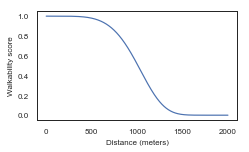

In [34]:
f, axs = plt.subplots(1,1, figsize=figsize(0.5, "golden"))


x = np.linspace(0,2000, 1000)
vectorized_walkscore = np.vectorize(walkscore)
y = walkscore(x)

plt.plot(x,y)
plt.xlabel("Distance (meters)")
plt.ylabel("Walkability score")

plt.tight_layout()
plt.savefig('../figures/manuscript/supplementary_walkability.pdf', bbox_inches='tight', pad_inches=0.05)

## Distribution crime

In [3]:
data_df = pd.read_csv('../data/generated_files/merged_features.csv')
data_df['sp_id'] = data_df['sp_id'].astype(str)

data_df = data_df.sort_values(['city', 'sp_id'])
data_df.head()

,sp_id,city,spatial_name,land_use_mix3,land_use_mix2,walkscore,core_walkscore,avg_block_area,n_blocks,sum_block_area,...,Burglary (breaking or entering),Criminal homicide,Larceny-theft (except motor vehicle theft),Motor vehicle theft,Rape,Robbery,ncrimes,disadvantage,residential_stability,small_blocks
2489,181963,LA,ego,0.711246,0.995054,0.431411,0.271692,9.879763,-3.490046,759.577076,...,10,0,0,7,0,1,19,-0.057363,0.297020,0.091914
3340,181964,LA,ego,0.324581,0.496285,0.576637,0.442002,10.003301,-3.824797,587.025972,...,3,0,0,3,0,0,7,-0.043512,-0.070415,0.090882
3491,181965,LA,ego,0.263234,0.472496,0.526915,0.502243,9.840906,-3.669718,945.302069,...,8,0,0,3,0,3,17,-0.031301,0.018948,0.092243
2059,181966,LA,ego,0.363468,0.596087,0.569559,0.628393,9.709909,-3.910386,1159.747167,...,6,0,0,2,0,6,15,-0.029151,-0.038889,0.093371
3485,181967,LA,ego,0.773234,0.984182,0.497871,0.588758,9.905465,-3.463240,1068.895438,...,1,0,0,4,0,1,13,0.072529,0.046129,0.091697


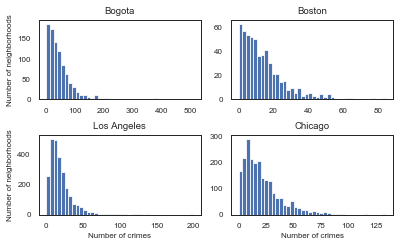

In [6]:
f, axs = plt.subplots(2, 2, figsize=figsize(0.8, "golden"))

for ax, c in zip(axs.reshape(-1), ['bogota', 'boston', 'LA', 'chicago']):
    ax.hist(data_df[data_df.city == c]['ncrimes'].values, bins=40)
    if c == 'LA':
        c = 'Los Angeles'
    ax.set_title(c.title())

axs[0, 0].set_ylabel("Number of neighborhoods")
axs[1, 0].set_ylabel("Number of neighborhoods")
axs[1, 0].set_xlabel("Number of crimes")
axs[1, 1].set_xlabel("Number of crimes")

plt.tight_layout()
plt.savefig('../figures/manuscript/supplementary_distribution_crime.pdf', bbox_inches='tight', pad_inches=0.05)